# 基础部分

## 对图表各区域的说明

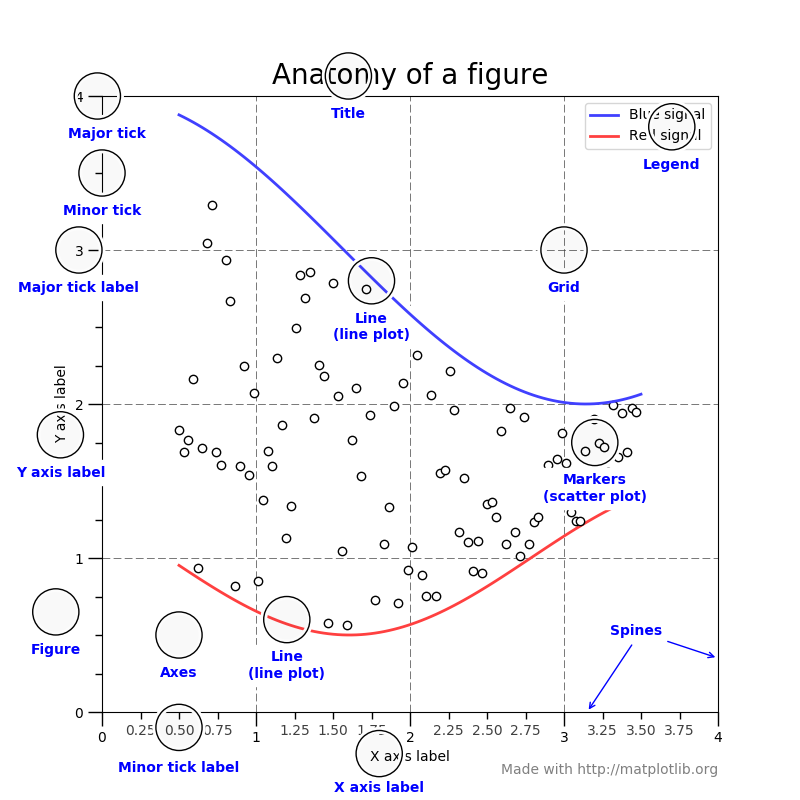

### Figure

顶级容器， 一个figure就是一张画布， 在上面分布着多个图表（<font color=#D44927>暂定axis</font>）。一个画布可以有多个图表， 至少有一个图表。

所有的操作之前都应该导入必要的包， matplotlib, numpy等等<br>
import numpy as np<br>
import matplotlib.pyplot as plt<br>
其中的plt是所有的绘图API接口， 有的地方会混淆使用pylab【在绘图的基础上集成部分numpy的计算接口】

In [1]:
import numpy as np
import matplotlib.pyplot as plt

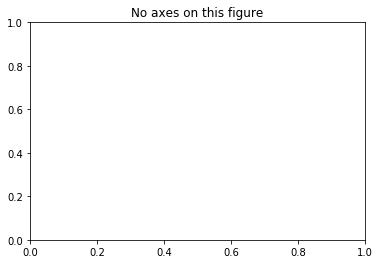

In [2]:
fig = plt.figure()  # an empty figure with no axes
plt.title('No axes on this figure')  # Add a title so we know which it is
plt.show()

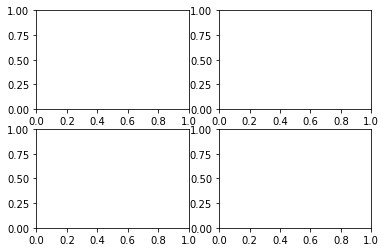

In [3]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
plt.show()

### axis(axes) 图表， plt原则

<font color='#E25661'>一个figure总会附带至少一个axis，plt调用时会在axis上绘制，自身不改变axis就会在一张图上绘制多个曲线或其他</font>

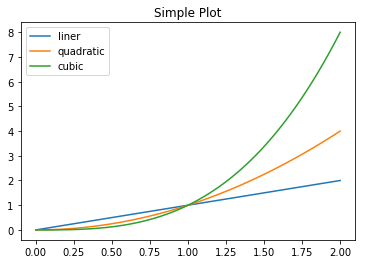

In [4]:
x = np.linspace(0, 2, 100) # 数据
plt.plot(x, x, label='liner')   # label 显示在legend中
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.title('Simple Plot')   # 设置标题
plt.legend()   # 显示legend
plt.show()

### 绘制两个子图

In [5]:
def my_plotter(ax, data1, data2, param_dict):
    '''
    ax : 需要绘制折线的图（axis）
    data1:x轴数据集
    data2,:y轴数据集
    param_dict : 传递绘图参数， plot运行时需要释放参数 **param_dict
    '''
    out = ax.plot(data1, data2, **param_dict)
    return out

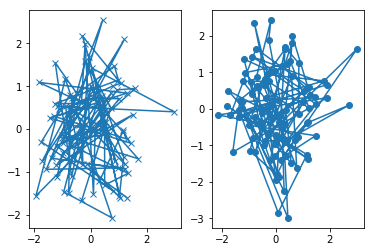

In [7]:
# 尝试4行100列的正态分布数据集， 用4的数据参数收集
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker':'x'})
my_plotter(ax2, data3, data4, {'marker':'o'})
plt.show()

## pyplot 简明教程 <font size=0.5>https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py</font>

吐槽：官网上的源码相对比较开发写的比较随性，plt的接口较多<br>
<font color='orange'>\*args, \*\*kwargs</font>收集释放参数随处可见，使得不参考官方参数解析很容易写出有问题的代码

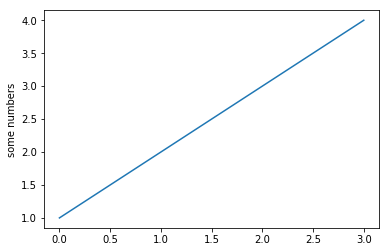

In [8]:
plt.plot([1, 2, 3, 4])  # x 自动等效 range(len(y))
plt.ylabel('some numbers')
plt.show()

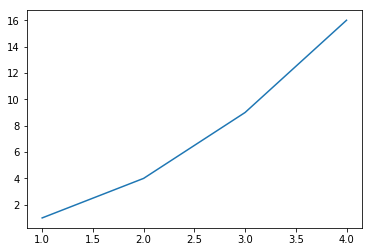

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

### 格式化plot绘图样式

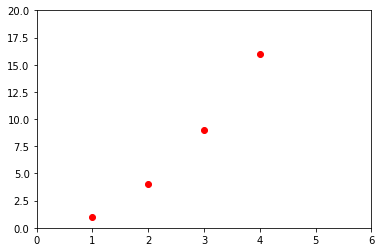

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')# 设置绘图为red 和点标记
plt.axis([0, 6, 0, 20])  # axix([xmin, xmax, ymin, ymax])
plt.show()

### 利用字典类型数据绘图

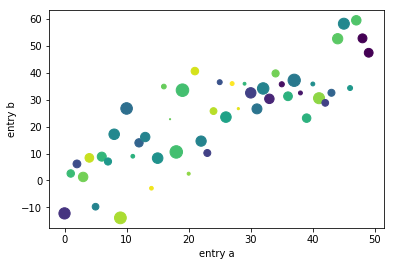

In [3]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

'''
c : colors, array-like
s : The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.
'''
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### plt使用变量，方便自定义坐标轴标记

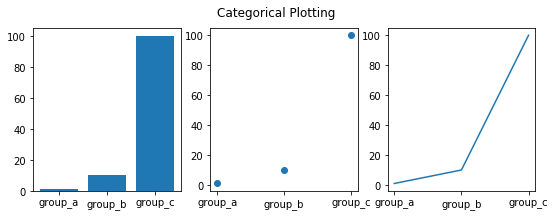

In [5]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

#调整自己的画布的横纵比列
plt.figure(figsize=(9, 3))
#调整绘图布局并定位1号位置
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
'''使用title只会作用在当前的定位处， 也就是最后一张图上'''
plt.suptitle('Categorical Plotting')
plt.show()

### 在绘图中加入文本标记

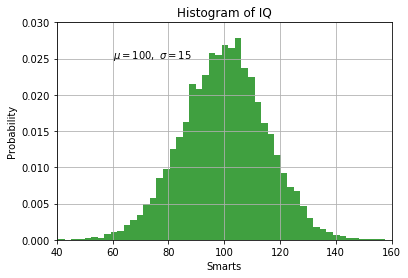

In [8]:
mu, sigma = 100, 15
# 产生高斯分布的智商数据
x = mu + sigma * np.random.randn(10000)

# the histogram of the data 频率直方图
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# 加入latex表达
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 带箭头的文本标记（我觉得有点烦）

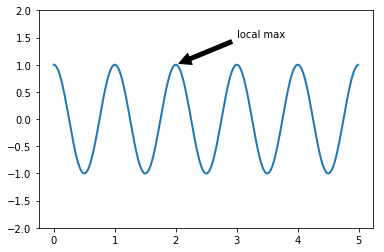

In [9]:
# ax就是定位后的图表位置，（111）的分布个人觉得多余了
ax = plt.subplot(111)
# （0-5）步长为0.01的数据   
# 经验告诉我这个数据不够‘精确’
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

# xy是箭头的位置，xytext是文本的位置
'''
shrink : 缩放比例
依据经验 arrowprops={'facecolor':'black', 'shrink':0.05}
'''
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

### 对数和其他非线性轴（<font color='#82C247'>轴的刻度分割方式</font>）

针对非线性的数据分布，来调整坐标轴刻度使得图片更美化，不至于将坐标轴拉伸的很难看。

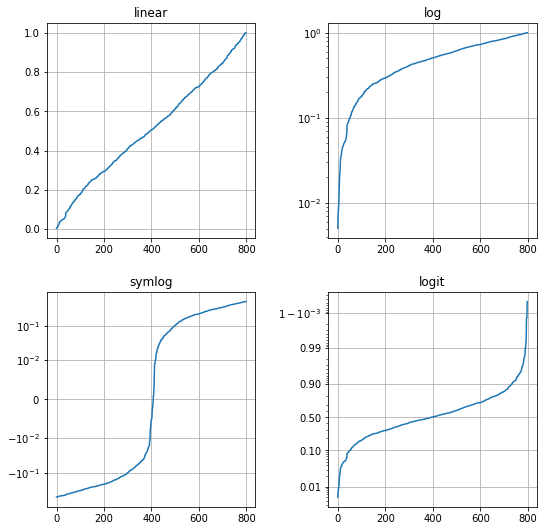

In [13]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# 设置随机数种子
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# 创建一个画布
plt.figure(figsize=(8, 8))

# 画第一张线性的图
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
# 指定当前的标题
plt.title('linear')
plt.grid(True)


# 画第二张log的图
plt.subplot(222)
plt.plot(x, y)
# 设置y轴刻度的风格为对数刻度
plt.yscale('log')
plt.title('log')
plt.grid(True)


# 第三张symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# 第四张logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()